# Analyse de données : Etudes du Jeu de données des élections présidentielles - Juin 2023

MAM 3A
AIT MOULOUD Marwane
MAYAMBA HATU Chadrack

Ce Notebook est joint d'une présentation pdf ainsi que d'un code python étant donné qu'il nous a été impossible de réaliser une carte sur jupyter 

In [361]:
#importation des librairies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import geopandas as gpd #Bibliotheque afin d'afficher les cartes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




# Préparation et extraction des données 

Nous avons commencé par préparer les données en modifiant les header afin d'avoir certaines données pour tous les candidats 

In [362]:
data = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')

/var/folders/9k/8487qp2x671cz4sgbyqfwhvm0000gn/T/ipykernel_49940/1610451398.py:1: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')


On convertit le type de données ce qui va nous etre utile par la suite :

In [363]:
data['Code du département'] = data['Code du département'].astype(str).str.zfill(2)


On réalise des dataframes à partir de chaque candidats afin de pouvoir les utiliser simplement par la suite 

In [364]:
df0 = data[['Libellé du département', 'Libellé de la circonscription', 'Libellé de la commune', 'Inscrits', 'Abstentions', 'Votants', 'Blancs', 'Nuls', 'Exprimés']]

df_DAN = data[['Nom.DAN', 'Prénom.DAN', 'Voix.DAN', '% Voix/Ins.DAN', '% Voix/Exp.DAN']]  # Nicolas Dupont-Aignan
df_MJL = data[['Nom.MJL', 'Prénom.MJL', 'Voix.MJL', '% Voix/Ins.MJL', '% Voix/Exp.MJL']]  # Jean-Luc Melenchon
df_LPM = data[['Nom.LPM', 'Prénom.LPM', 'Voix.LPM', '% Voix/Ins.LPM', '% Voix/Exp.LPM']]  # Marine Le Pen
df_PV = data[['Nom.PV', 'Prénom.PV', 'Voix.PV', '% Voix/Ins.PV', '% Voix/Exp.PV']]   # Valérie Pecresse
df_AN = data[['Nom.AN', 'Prénom.AN', 'Voix.AN', '% Voix/Ins.AN', '% Voix/Exp.AN']]   # Nathalie Arthaud
df_PP = data[['Nom.PP', 'Prénom.PP', 'Voix.PP', '% Voix/Ins.PP', '% Voix/Exp.PP']]   # Philippe Poutou
df_ME = data[['Nom.ME', 'Prénom.ME', 'Voix.ME', '% Voix/Ins.ME', '% Voix/Exp.ME']]   # Emmanuel Macron
df_RF = data[['Nom.RF', 'Prénom.RF', 'Voix.RF', '% Voix/Ins.RF', '% Voix/Exp.RF']]   # Fabien Roussel
df_JY = data[['Nom.JY', 'Prénom.JY', 'Voix.JY', '% Voix/Ins.JY', '% Voix/Exp.JY']]   # Yannick Jadot
df_LJ = data[['Nom.LJ', 'Prénom.LJ', 'Voix.LJ', '% Voix/Ins.LJ', '% Voix/Exp.LJ']]   # Jean Lassalle
df_ZE = data[['Nom.ZE', 'Prénom.ZE', 'Voix.ZE', '% Voix/Ins.ZE', '% Voix/Exp.ZE']]   # Eric Zemmour
df_HA = data[['Nom.HA', 'Prénom.HA', 'Voix.HA', '% Voix/Ins.HA', '% Voix/Exp.HA']]   # Anne Hidalgo

Résumé des dataframe 

In [365]:
df_DAN.describe()

,Voix.DAN,% Voix/Ins.DAN,% Voix/Exp.DAN
count,69681.000000,69681.000000,69681.000000
mean,10.406782,1.674813,2.240870
std,9.474509,1.186328,1.517555
min,0.000000,0.000000,0.000000
25%,5.000000,0.970000,1.340000
50%,9.000000,1.480000,2.010000
75%,15.000000,2.120000,2.830000
max,1181.000000,53.330000,53.330000


Nous avons 69681 observations

# Statistiques générales 

## Statistique sur les inscrits

In [366]:
totalIns = np.sum(data['Inscrits'])

totalExp = np.sum(data['Exprimés'])
totalBlanc = np.sum(data['Blancs'])
totalAbs = np.sum(data['Abstentions'])
TotalNuls = np.sum(data['Nuls'])

print("Nombre d'inscrits : ", totalIns)
print("\nNombre de votes exprimés : ", totalExp)
print("Nombre d'abstentionnistes : ", totalAbs)
print("Nombre de votes blancs : ", totalBlanc)
print("Nombre de votes nuls : ", TotalNuls)
print("\nTotal inscrits vérificaton :",totalAbs+totalBlanc+TotalNuls+totalExp)

Nombre d'inscrits :  48747231

Nombre de votes exprimés :  35132427
Nombre d'abstentionnistes :  12824061
Nombre de votes blancs :  543593
Nombre de votes nuls :  247150

Total inscrits vérificaton : 48747231


On souhaite savoir les taux d'abstention de participation ainsi que de votes nuls 

Abstention :  26.31 %
Participation :  72.07 %
Dont 1.12 % de votes blancs
Votes nuls :  0.51 %


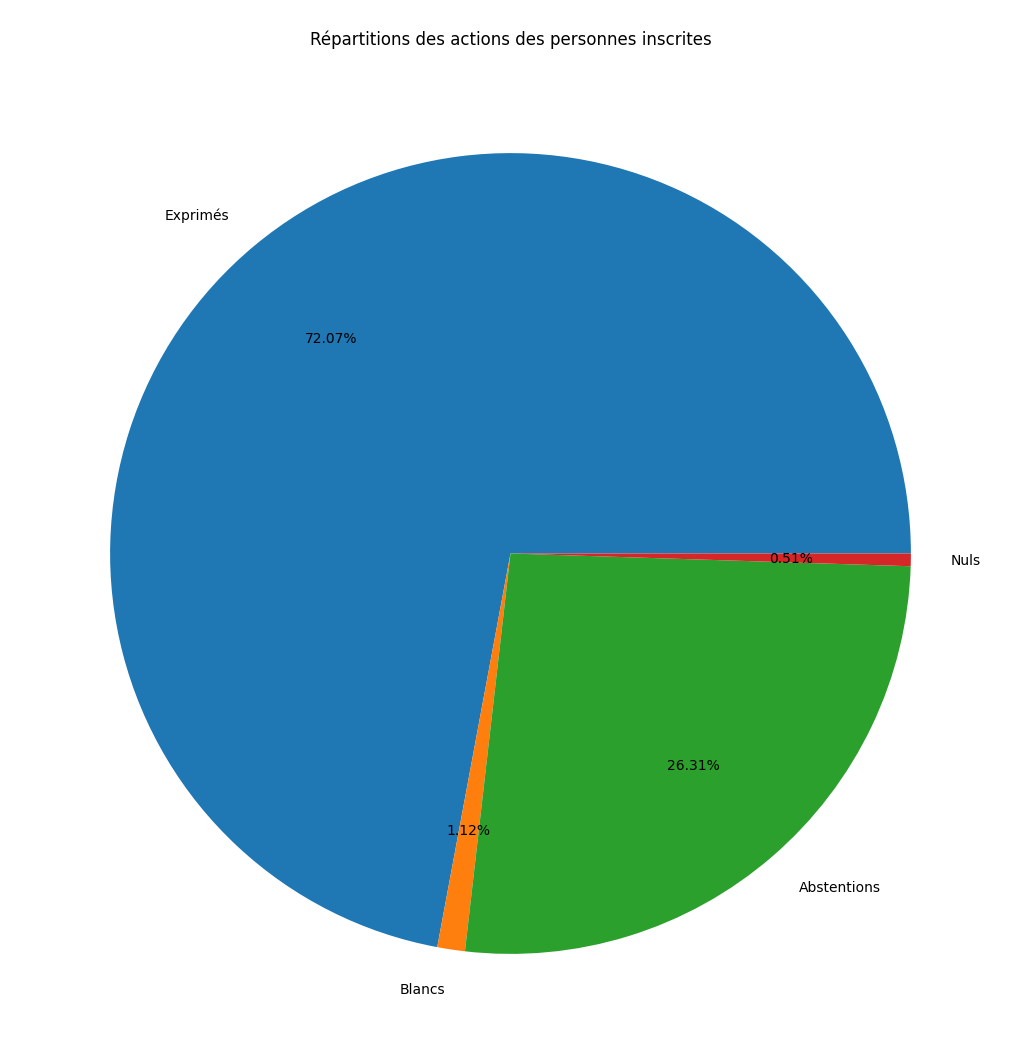

In [367]:
rappExp = 100*totalExp/totalIns
rappAbs = 100*totalAbs/totalIns
rappBlanc = 100*totalBlanc/totalIns
rappNul = 100*TotalNuls/totalIns

print("Abstention : ", round(rappAbs, 2), "%")
print("Participation : ", round(rappExp, 2), "%")
print("Dont", round(rappBlanc, 2), "% de votes blancs")
print("Votes nuls : ", round(rappNul, 2), "%")


#### Graphique
statParticipation = np.array([totalExp, totalBlanc, totalAbs, TotalNuls])

labelParticipation = ['Exprimés', 'Blancs', 'Abstentions', 'Nuls']

camembertDepObs = plt.pie(statParticipation, labels=labelParticipation, normalize = True, autopct = lambda statParticipation: str(round(statParticipation, 2)) + '%', pctdistance=0.7)
plt.rcParams["figure.figsize"] = [10, 10]
plt.title("\nRépartitions des actions des personnes inscrites")
plt.show()

Grace a ce camenbert on remarque que la part des nuls et Blancs est assez negligeable cependant la part des abstentionistes est plutot conséquente.

### Nous allons maintenant voir les différentes statistiques des candidats a différentes échelles :  Nationale, Départementale et Communale.

### Tout d'abord à l'échelle communale

On cree des datasets qui donne les resultats par commune 

In [368]:
df_ZE_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.ZE', aggfunc = 'sum')
df_DAN_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.DAN', aggfunc = 'sum')
df_AN_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.AN', aggfunc = 'sum')
df_HA_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.HA', aggfunc = 'sum')
df_JY_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.JY', aggfunc = 'sum')
df_LJ_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.LJ', aggfunc = 'sum')
df_LPM_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.LPM', aggfunc = 'sum')
df_ME_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.ME', aggfunc = 'sum')
df_MJL_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.MJL', aggfunc = 'sum')
df_PV_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.PV', aggfunc = 'sum')
df_PP_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.PP', aggfunc = 'sum')
df_RF_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Voix.RF', aggfunc = 'sum')
df_BLANC_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Blancs', aggfunc = 'sum')
df_ABS_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Abstentions', aggfunc = 'sum')
df_NUL_comm = pd.pivot_table(data = data, index = 'Libellé de la commune', values = 'Nuls', aggfunc = 'sum')

In [369]:
def camembertCommObs(Obs, Abs):
    if Abs == True:
        voixCandidatCommObs = np.array([np.sum(df_AN_comm['Voix.AN'][Obs]), np.sum(df_RF_comm['Voix.RF'][Obs]), 
        np.sum(df_ME_comm['Voix.ME'][Obs]), np.sum(df_LJ_comm['Voix.LJ'][Obs]), 
        np.sum(df_LPM_comm['Voix.LPM'][Obs]), np.sum(df_ZE_comm['Voix.ZE'][Obs]), 
        np.sum(df_MJL_comm['Voix.MJL'][Obs]), np.sum(df_HA_comm['Voix.HA'][Obs]), 
        np.sum(df_JY_comm['Voix.JY'][Obs]), np.sum(df_PV_comm['Voix.PV'][Obs]), 
        np.sum(df_PP_comm['Voix.PP'][Obs]), np.sum(df_DAN_comm['Voix.DAN'][Obs]),
        np.sum(df_BLANC_comm['Blancs'][Obs]), np.sum(df_ABS_comm['Abstentions'][Obs]), np.sum(df_NUL_comm['Nuls'][Obs])])

        labelCommObs = [data['Nom.AN'][0], data['Nom.RF'][0], data['Nom.ME'][0], data['Nom.LJ'][0], data['Nom.LPM'][0], data['Nom.ZE'][0], data['Nom.MJL'][0], data['Nom.HA'][0], 
        data['Nom.JY'][0], data['Nom.PV'][0], data['Nom.PP'][0], data['Nom.DAN'][0], 'BLANCS', 'ABSTENTIONS', 'NULS']

        plt.pie(voixCandidatCommObs, labels=labelCommObs, normalize = True, autopct = lambda voixCandidatCommObs: str(round(voixCandidatCommObs, 2)) + '%', pctdistance=0.9)
        plt.rcParams["figure.figsize"] = [13, 13]
        plt.title(label=['Résultats sans blancs, abstentions et nuls dans la commune',Obs])
        plt.show()
    else:
        voixCandidatCommObs = np.array([np.sum(df_AN_comm['Voix.AN'][Obs]), np.sum(df_RF_comm['Voix.RF'][Obs]), 
        np.sum(df_ME_comm['Voix.ME'][Obs]), np.sum(df_LJ_comm['Voix.LJ'][Obs]), 
        np.sum(df_LPM_comm['Voix.LPM'][Obs]), np.sum(df_ZE_comm['Voix.ZE'][Obs]), 
        np.sum(df_MJL_comm['Voix.MJL'][Obs]), np.sum(df_HA_comm['Voix.HA'][Obs]), 
        np.sum(df_JY_comm['Voix.JY'][Obs]), np.sum(df_PV_comm['Voix.PV'][Obs]), 
        np.sum(df_PP_comm['Voix.PP'][Obs]), np.sum(df_DAN_comm['Voix.DAN'][Obs])])

        labelCommObs = [data['Nom.AN'][0], data['Nom.RF'][0], data['Nom.ME'][0], data['Nom.LJ'][0], data['Nom.LPM'][0], data['Nom.ZE'][0], data['Nom.MJL'][0], data['Nom.HA'][0], 
        data['Nom.JY'][0], data['Nom.PV'][0], data['Nom.PP'][0], data['Nom.DAN'][0]]

        plt.pie(voixCandidatCommObs, labels=labelCommObs, normalize = True, autopct = lambda voixCandidatCommObs: str(round(voixCandidatCommObs, 2)) + '%', pctdistance=0.9)
        plt.rcParams["figure.figsize"] = [13, 13]
        plt.title(label=['Résultats sans blancs, abstentions et nuls dans la commune : ', Obs])
        plt.show()

#### Résultats de la ville de Nice en excluant les votes blancs nuls ou les les abstentions

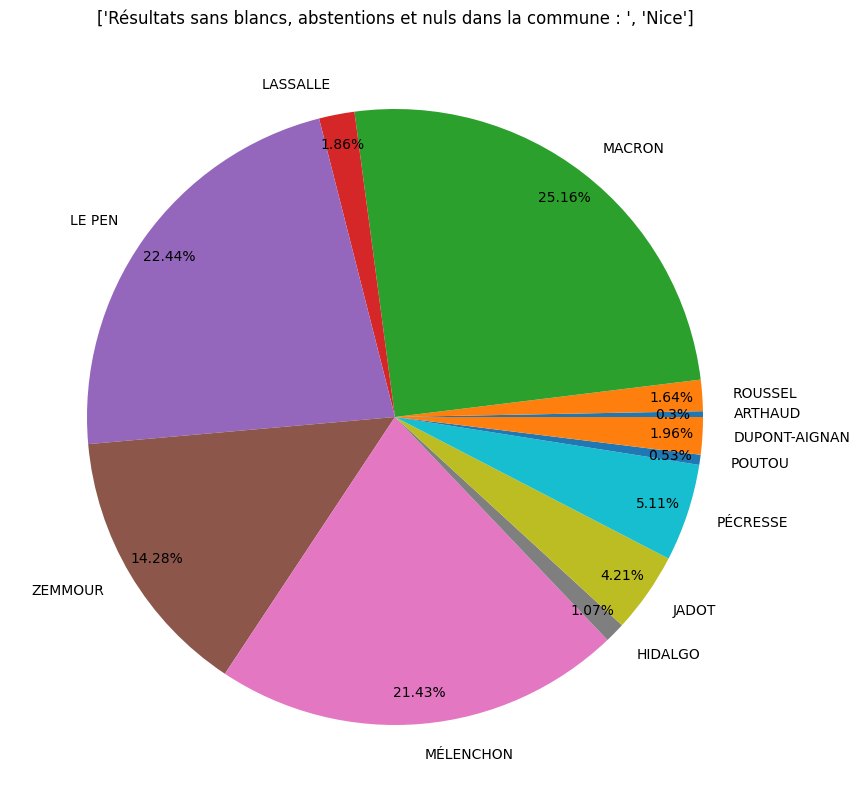

In [370]:
comObs = 'Nice'
AbsBlancNul = False
camembertCommObs(comObs, AbsBlancNul)

### Nous allons maintenant voir des frames incluant les statistiques pour chaque candidats dans differentes villes à la fois 


In [371]:
# Fonction générique donnant voix et taux par Communes
def comm_candidat(voix, prct, choix, asc):
    tab = data[['Libellé de la commune', voix]]
    tab1 = data[['Libellé de la commune', prct]]
      
    frame = pd.DataFrame(tab)
    frame1 = pd.DataFrame(tab1)
     
    res = frame.groupby(["Libellé de la commune"]).sum()
    a = res.reset_index()
    res1 = frame1.groupby(["Libellé de la commune"]).mean()
    b = res1.reset_index()

        
    total = a.merge(b)

    if choix == 1 : 
            resultat = total.sort_values(by=voix,ascending=asc) 
    elif choix == 2 :
            resultat = total.sort_values(by=prct,ascending=asc)

    return resultat

Voici quelques Chiffres sur les Votes Nuls

In [372]:
# 10 premieres Communes avec le plus d'abstention en absolu 
comm_candidat('Abstentions','% Abs/Ins', 1, False).head(10)

,Libellé de la commune,Abstentions,% Abs/Ins
21603,Paris,296668,21.677856
17986,Marseille,166363,32.139958
16777,Londres,77070,69.070000
11077,Geneve,69035,55.770000
20565,Nice,65792,29.740476
25146,Saint-Denis,64003,41.794677
30106,Toulouse,58564,23.382792
4368,Bruxelles,54509,56.050000
17223,Lyon,52825,18.427311
20291,Nantes,48261,24.936135


## Notre président actuel ???

In [373]:
comm_candidat('Voix.ME','% Voix/Ins.ME', 1, False).head(10)

,Libellé de la commune,Voix.ME,% Voix/Ins.ME
21603,Paris,372820,27.610833
17986,Marseille,78814,14.980707
17223,Lyon,75199,25.585607
30106,Toulouse,51633,19.813887
20291,Nantes,43386,21.986184
3515,Bordeaux,40832,25.033649
20565,Nice,38249,17.407698
29280,Strasbourg,31074,22.240486
23570,Rennes,27165,21.786296
3698,Boulogne-Billancourt,26514,36.188857


In [374]:
comm_candidat('Voix.ME','% Voix/Ins.ME', 2, False).head(10)

,Libellé de la commune,Voix.ME,% Voix/Ins.ME
23409,Rapsécourt,13,56.520
3043,Bigorno,55,56.120
21189,Origny,21,52.500
30535,Ua-Huka,275,52.235
29499,Taizé,36,51.430
29376,Sébeville,16,50.000
3261,Blousson-Sérian,18,50.000
13643,La Chapelle-sous-Orbais,23,50.000
30240,Trassanel,13,50.000
777,Apremont-sur-Allier,25,49.020


### Nous allons maintenant discretiser selon le departement de notre choix

In [375]:
# Dataset de voix d'un candidat donnée par département
df_ZE_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.ZE', aggfunc = 'sum')
df_DAN_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.DAN', aggfunc = 'sum')
df_AN_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.AN', aggfunc = 'sum')
df_HA_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.HA', aggfunc = 'sum')
df_JY_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.JY', aggfunc = 'sum')
df_LJ_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.LJ', aggfunc = 'sum')
df_LPM_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.LPM', aggfunc = 'sum')
df_ME_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.ME', aggfunc = 'sum')
df_MJL_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.MJL', aggfunc = 'sum')
df_PV_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.PV', aggfunc = 'sum')
df_PP_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.PP', aggfunc = 'sum')
df_RF_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Voix.RF', aggfunc = 'sum')
df_BLANC_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Blancs', aggfunc = 'sum')
df_ABS_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Abstentions', aggfunc = 'sum')
df_NUL_dep = pd.pivot_table(data = data, index = 'Libellé du département', values = 'Nuls', aggfunc = 'sum')

In [376]:
def camembertDepObs(depObs, Abs):
    if Abs == True :
        voixCandidatDepObs = np.array([np.sum(df_AN_dep['Voix.AN'][depObs]), np.sum(df_RF_dep['Voix.RF'][depObs]), 
        np.sum(df_ME_dep['Voix.ME'][depObs]), np.sum(df_LJ_dep['Voix.LJ'][depObs]), 
        np.sum(df_LPM_dep['Voix.LPM'][depObs]), np.sum(df_ZE_dep['Voix.ZE'][depObs]), 
        np.sum(df_MJL_dep['Voix.MJL'][depObs]), np.sum(df_HA_dep['Voix.HA'][depObs]), 
        np.sum(df_JY_dep['Voix.JY'][depObs]), np.sum(df_PV_dep['Voix.PV'][depObs]), 
        np.sum(df_PP_dep['Voix.PP'][depObs]), np.sum(df_DAN_dep['Voix.DAN'][depObs]),
        np.sum(df_BLANC_dep['Blancs'][depObs]), np.sum(df_ABS_dep['Abstentions'][depObs]), np.sum(df_NUL_dep['Nuls'][depObs])])

        labelDepObs = [data['Nom.AN'][0], data['Nom.RF'][0], data['Nom.ME'][0], data['Nom.LJ'][0], data['Nom.LPM'][0], data['Nom.ZE'][0], data['Nom.MJL'][0], data['Nom.HA'][0], 
        data['Nom.JY'][0], data['Nom.PV'][0], data['Nom.PP'][0], data['Nom.DAN'][0], 'BLANCS', 'ABSTENTIONS', 'NULS']

        plt.pie(voixCandidatDepObs, labels=labelDepObs, normalize = True, autopct = lambda voixCandidatDepObs: str(round(voixCandidatDepObs, 2)) + '%', pctdistance=0.9)
        plt.rcParams["figure.figsize"] = [13, 13]
        plt.title(label=['Résultats avec blancs, abstentions et nuls dans la commune : ', depObs])
        plt.show()
    else:
        voixCandidatDepObs = np.array([np.sum(df_AN_dep['Voix.AN'][depObs]), np.sum(df_RF_dep['Voix.RF'][depObs]), 
        np.sum(df_ME_dep['Voix.ME'][depObs]), np.sum(df_LJ_dep['Voix.LJ'][depObs]), 
        np.sum(df_LPM_dep['Voix.LPM'][depObs]), np.sum(df_ZE_dep['Voix.ZE'][depObs]), 
        np.sum(df_MJL_dep['Voix.MJL'][depObs]), np.sum(df_HA_dep['Voix.HA'][depObs]), 
        np.sum(df_JY_dep['Voix.JY'][depObs]), np.sum(df_PV_dep['Voix.PV'][depObs]), 
        np.sum(df_PP_dep['Voix.PP'][depObs]), np.sum(df_DAN_dep['Voix.DAN'][depObs])])
        
        labelDepObs = [data['Nom.AN'][0], data['Nom.RF'][0], data['Nom.ME'][0], data['Nom.LJ'][0], data['Nom.LPM'][0], data['Nom.ZE'][0], data['Nom.MJL'][0], data['Nom.HA'][0], 
        data['Nom.JY'][0], data['Nom.PV'][0], data['Nom.PP'][0], data['Nom.DAN'][0]]
        plt.pie(voixCandidatDepObs, labels=labelDepObs, normalize = True, autopct = lambda voixCandidatDepObs: str(round(voixCandidatDepObs, 2)) + '%', pctdistance=0.9)
        plt.rcParams["figure.figsize"] = [13, 13]
        plt.title(label= ['Résultats sans blancs, abstentions et nuls dans le département : ', depObs])
        plt.show()

#### Résultats du département du Rhone en excluant les votes blancs nuls ou les abstentions


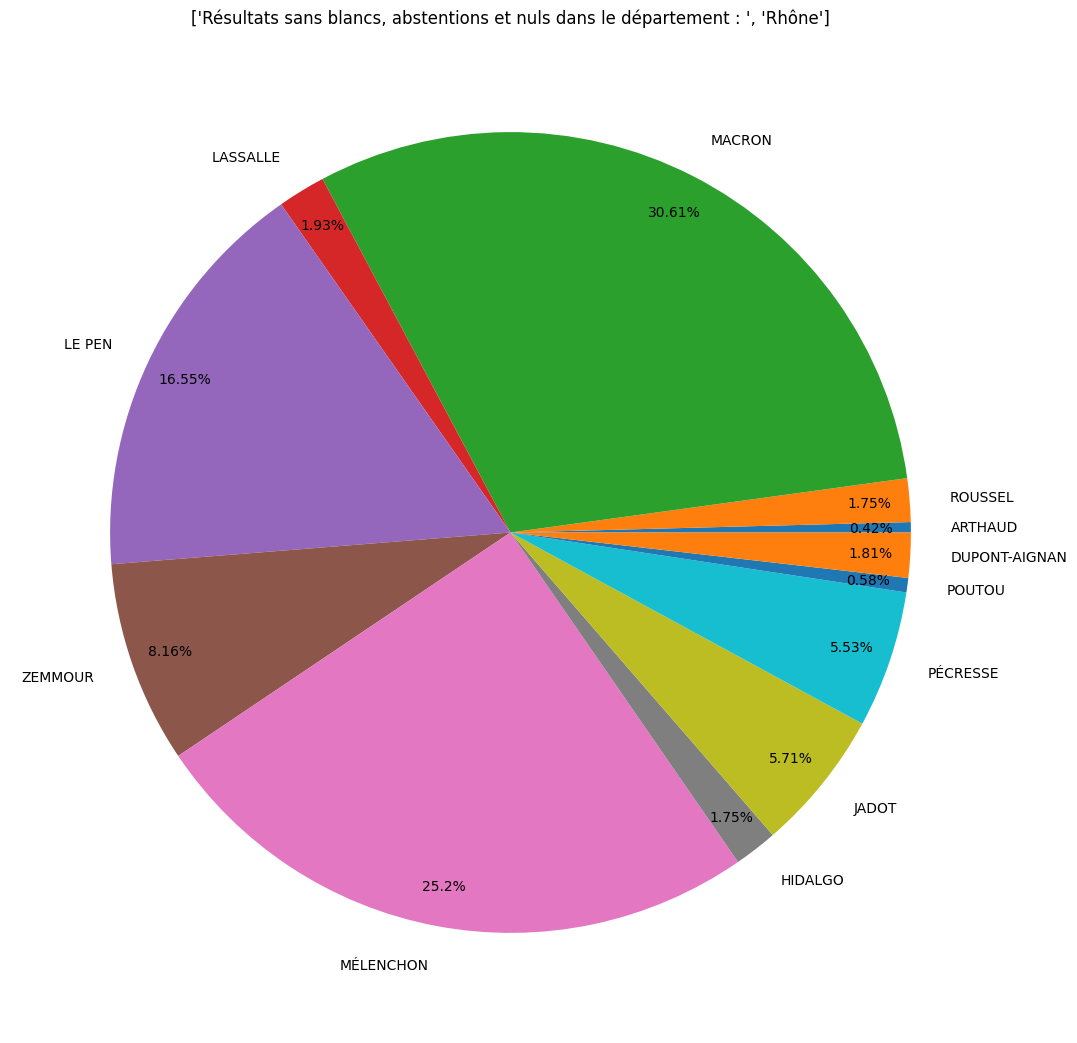

In [377]:
depObs = 'Rhône'
AbsBlancNul = False

camembertDepObs(depObs, AbsBlancNul)

### Nous allons maintenant pouvoir voir les statistiques d'un candidat pour plusieurs départements

In [378]:
# Fonction pour regrouper les résultats par département et candidat
def dep_candidat(voix, prct, choix, asc):
    tab = data[['Libellé du département', voix]]
    tab1 = data[['Libellé du département', prct]]
      
    frame = pd.DataFrame(tab)
    frame1 = pd.DataFrame(tab1)
     
    res = frame.groupby(["Libellé du département"]).sum()
    a = res.reset_index()
    res1 = frame1.groupby(["Libellé du département"]).mean()
    b = res1.reset_index()

        
    total = a.merge(b)

    if choix == 1 : 
            resultat = total.sort_values(by=voix,ascending=asc) 
    elif choix == 2 :
            resultat = total.sort_values(by=prct,ascending=asc)

    return resultat

In [379]:
# 10 premiers Département avec le plus d'abstention en absolu
dep_candidat('Abstentions','% Abs/Ins', 1,False).head(10)

,Libellé du département,Abstentions,% Abs/Ins
31,Français établis hors de France,931455,63.551143
74,Nord,514033,27.737777
12,Bouches-du-Rhône,383816,27.026269
54,La Réunion,313159,46.502989
78,Paris,296668,21.677856
79,Pas-de-Calais,286319,24.228307
84,Rhône,255580,21.522741
34,Gironde,249014,21.033751
91,Seine-Saint-Denis,239927,30.252314
58,Loire-Atlantique,236339,22.457486


In [380]:
dep_candidat('Voix.LPM','% Voix/Ins.LPM', 1,False).head(10)

,Libellé du département,Voix.LPM,% Voix/Ins.LPM
74,Nord,373127,21.466359
79,Pas-de-Calais,305816,28.180422
12,Bouches-du-Rhône,264753,18.936650
34,Gironde,191542,17.808384
99,Var,183287,22.142497
90,Seine-Maritime,177806,22.491841
48,Hérault,165734,19.658844
72,Moselle,159254,23.253094
92,Seine-et-Marne,155738,19.011782
52,Isère,154799,17.819832


## Gardons la meme echelle mais avec une vue plus globale 

### Voir les détails et l'interprétation sur le pdf

In [381]:
sf = gpd.read_file('dep.geojson') #on importe le fichier geojson qui va nous permettre de représenter une carte des départements français

In [382]:
def dep_candidat(voix_col, choix, asc):
    tab = data[['Code du département', 'Libellé du département', voix_col]]

    tab = tab.rename(columns={voix_col: choix})

    tab = tab.groupby(['Code du département', 'Libellé du département']).sum().reset_index()

    tab = tab.sort_values(by=[choix], ascending=asc)

    return tab

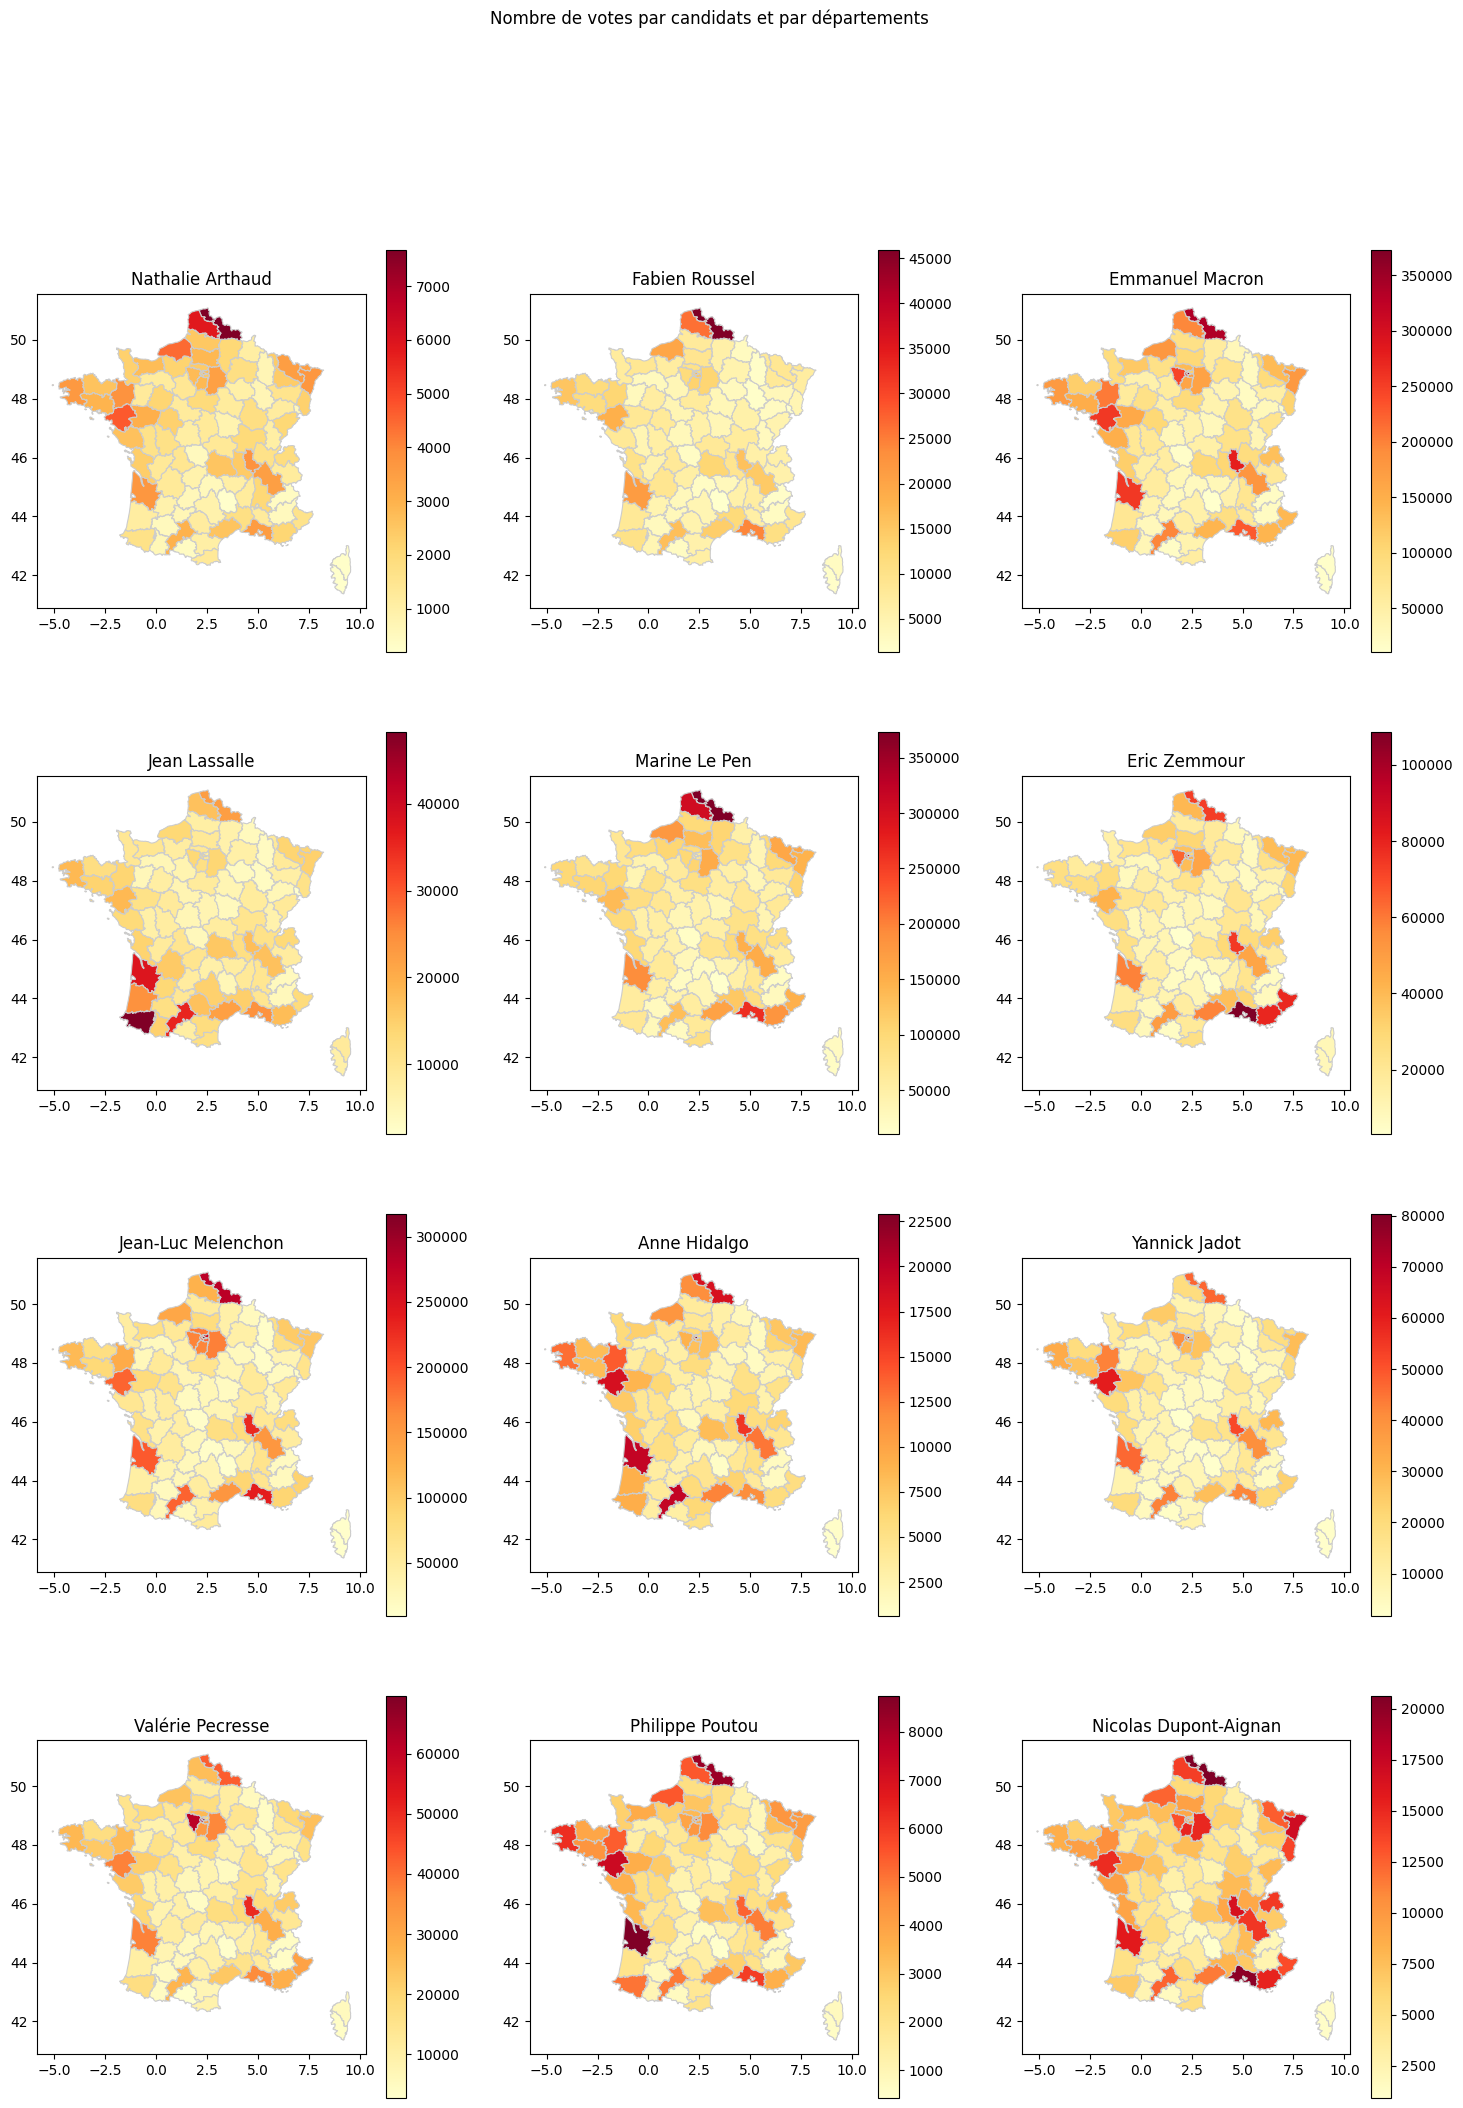

In [383]:
# Appel de la fonction pour chaque candidat
tab_AN  = dep_candidat('Voix.AN', 'Nathalie Arthaud', False)
tab_RF= dep_candidat('Voix.RF', 'Fabien Roussel', False)
tab_ME= dep_candidat('Voix.ME', 'Emmanuel Macron', False)
tab_LJ= dep_candidat('Voix.LJ', 'Jean Lassalle', False)
tab_LPM= dep_candidat('Voix.LPM', 'Marine Le Pen', False)
tab_ZE= dep_candidat('Voix.ZE', 'Eric Zemmour', False)
tab_MJL= dep_candidat('Voix.MJL', 'Jean-Luc Melenchon', False)
tab_HA= dep_candidat('Voix.HA', 'Anne Hidalgo', False)
tab_JY = dep_candidat('Voix.JY', 'Yannick Jadot', False)
tab_PV= dep_candidat('Voix.PV', 'Valérie Pecresse', False)
tab_PP= dep_candidat('Voix.PP', 'Philippe Poutou', False)
tab_DAN = dep_candidat('Voix.DAN', 'Nicolas Dupont-Aignan', False)

# Fusion des données avec le fichier geojson
df_AN = sf.merge(tab_AN, left_on='code', right_on='Code du département')
df_RF = sf.merge(tab_RF, left_on='code', right_on='Code du département')
df_ME = sf.merge(tab_ME, left_on='code', right_on='Code du département')
df_LJ = sf.merge(tab_LJ, left_on='code', right_on='Code du département')
df_LPM = sf.merge(tab_LPM, left_on='code', right_on='Code du département')
df_ZE = sf.merge(tab_ZE, left_on='code', right_on='Code du département')
df_MJL = sf.merge(tab_MJL, left_on='code', right_on='Code du département')
df_HA = sf.merge(tab_HA, left_on='code', right_on='Code du département')
df_JY = sf.merge(tab_JY, left_on='code', right_on='Code du département')
df_PV = sf.merge(tab_PV, left_on='code', right_on='Code du département')
df_PP = sf.merge(tab_PP, left_on='code', right_on='Code du département')
df_DAN = sf.merge(tab_DAN, left_on='code', right_on='Code du département')

# Affichage des cartes

fig, axs = plt.subplots(4, 3, figsize=(18, 24))

df_AN.plot(column='Nathalie Arthaud', cmap='YlOrRd', linewidth=0.8, ax=axs[0, 0], edgecolor='0.8', legend=True)
axs[0, 0].set_title("Nathalie Arthaud")


df_RF.plot(column='Fabien Roussel', cmap='YlOrRd', linewidth=0.8, ax=axs[0, 1], edgecolor='0.8', legend=True)
axs[0, 1].set_title("Fabien Roussel")


df_ME.plot(column='Emmanuel Macron', cmap='YlOrRd', linewidth=0.8, ax=axs[0, 2], edgecolor='0.8', legend=True)
axs[0, 2].set_title("Emmanuel Macron")


df_LJ.plot(column='Jean Lassalle', cmap='YlOrRd', linewidth=0.8, ax=axs[1, 0], edgecolor='0.8', legend=True)
axs[1, 0].set_title("Jean Lassalle")


df_LPM.plot(column='Marine Le Pen', cmap='YlOrRd', linewidth=0.8, ax=axs[1, 1], edgecolor='0.8', legend=True)
axs[1, 1].set_title("Marine Le Pen")


df_ZE.plot(column='Eric Zemmour', cmap='YlOrRd', linewidth=0.8, ax=axs[1, 2], edgecolor='0.8', legend=True)
axs[1, 2].set_title("Eric Zemmour")


df_MJL.plot(column='Jean-Luc Melenchon', cmap='YlOrRd', linewidth=0.8, ax=axs[2, 0], edgecolor='0.8', legend=True)
axs[2, 0].set_title("Jean-Luc Melenchon")


df_HA.plot(column='Anne Hidalgo', cmap='YlOrRd', linewidth=0.8, ax=axs[2, 1], edgecolor='0.8', legend=True)
axs[2, 1].set_title("Anne Hidalgo")

df_JY.plot(column='Yannick Jadot', cmap='YlOrRd', linewidth=0.8, ax=axs[2, 2], edgecolor='0.8', legend=True)
axs[2, 2].set_title("Yannick Jadot")


df_PV.plot(column='Valérie Pecresse', cmap='YlOrRd', linewidth=0.8, ax=axs[3, 0], edgecolor='0.8', legend=True)
axs[3, 0].set_title("Valérie Pecresse")


df_PP.plot(column='Philippe Poutou', cmap='YlOrRd', linewidth=0.8, ax=axs[3, 1], edgecolor='0.8', legend=True)
axs[3, 1].set_title("Philippe Poutou")


df_DAN.plot(column='Nicolas Dupont-Aignan', cmap='YlOrRd', linewidth=0.8, ax=axs[3, 2], edgecolor='0.8', legend=True)
axs[3, 2].set_title("Nicolas Dupont-Aignan")

fig.suptitle("Nombre de votes par candidats et par départements ")

plt.show()

On remarque que le département de Le Nord est pour beaucoup de candidats un departement avec de beaucoup de votes, Pourquoi?

C'est le département français le plus peuplé avec 2 600 000 habitants.

### Apres avoir vue cette vision globale nous allons nous attaquer à l'échelle nationale de cette élection

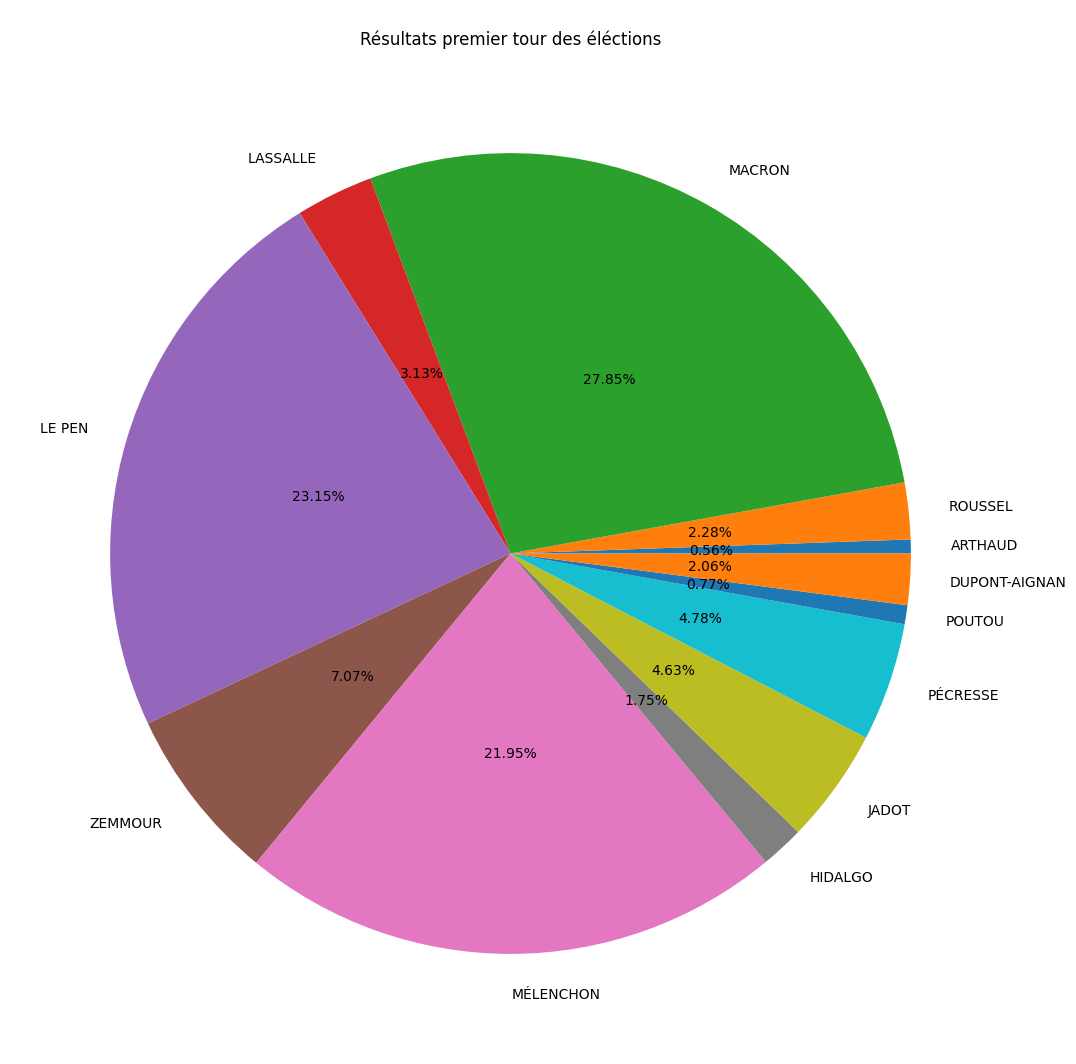

In [415]:
voixCandidat = np.array([np.sum(data['Voix.AN']), np.sum(data['Voix.RF']), np.sum(data['Voix.ME']), np.sum(data['Voix.LJ']), np.sum(data['Voix.LPM']), np.sum(data['Voix.ZE']), 
                        np.sum(data['Voix.MJL']), np.sum(data['Voix.HA']), np.sum(data['Voix.JY']), np.sum(data['Voix.PV']), np.sum(data['Voix.PP']), np.sum(data['Voix.DAN'])])

label = [data['Nom.AN'][0], data['Nom.RF'][0], data['Nom.ME'][0], data['Nom.LJ'][0], data['Nom.LPM'][0], data['Nom.ZE'][0], data['Nom.MJL'][0], data['Nom.HA'][0], data['Nom.JY'][0], data['Nom.PV'][0], data['Nom.PP'][0], data['Nom.DAN'][0]]

camembert = plt.pie(voixCandidat, labels=label, normalize = True, autopct = lambda voixCandidat: str(round(voixCandidat, 2)) + '%', pctdistance=0.5)
plt.rcParams["figure.figsize"] = [10, 10]
plt.title("\nRésultats premier tour des éléctions")
plt.show()

Comme nous l'avons vu précédemment, l'abstention représente 1/4 du scrutin, soit quasiment 1/3 des votes exprimés, c'est-à-dire plus que le gagnant du premier tour : Emmanuel Macron.

Qui sont les plus gros abstentionniste?

In [385]:
def dep_candidat(voix, prct, choix, asc):
    tab = data[['Libellé du département', voix]]
    tab1 = data[['Libellé du département', prct]]
      
    frame = pd.DataFrame(tab)
    frame1 = pd.DataFrame(tab1)
     
    res = frame.groupby(["Libellé du département"]).sum()
    a = res.reset_index()
    res1 = frame1.groupby(["Libellé du département"]).mean()
    b = res1.reset_index()

        
    total = a.merge(b)

    if choix == 1 : 
            resultat = total.sort_values(by=voix,ascending=asc) 
    elif choix == 2 :
            resultat = total.sort_values(by=prct,ascending=asc)

    return resultat

In [386]:
dep_candidat('Abstentions','% Abs/Ins', 2, False).head(10)

,Libellé du département,Abstentions,% Abs/Ins
75,Nouvelle-Calédonie,145807,73.164848
80,Polynésie française,142121,65.641320
36,Guyane,65754,64.384403
31,Français établis hors de France,931455,63.551143
85,Saint-Martin/Saint-Barthélemy,15812,59.948846
68,Mayotte,55024,59.400765
66,Martinique,174588,57.606156
35,Guadeloupe,174592,55.469192
54,La Réunion,313159,46.502989
86,Saint-Pierre-et-Miquelon,2272,46.465000


#### On remarque que ce sont en pourcentage les territoire d'outre-mer qui sont les plus abstentionniste

# Réalisons une analyse en composantes principales 

## Essayons maintenant de faire une ACP par département

In [387]:
# Création de notre dataset
df_acp_dep = data[['Libellé du département', 'Voix.ME', 'Voix.LPM', 'Voix.MJL', 'Voix.ZE', 'Voix.PV', 'Voix.JY', 'Voix.LJ', 'Voix.DAN', 'Voix.HA', 'Voix.RF', 'Voix.PP', 'Voix.AN']].groupby('Libellé du département').sum()
#df_acp_dep = df_acp_dep.reset_index()
df_acp_dep.reset_index()

,Libellé du département,Voix.ME,Voix.LPM,Voix.MJL,Voix.ZE,Voix.PV,Voix.JY,Voix.LJ,Voix.DAN,Voix.HA,Voix.RF,Voix.PP,Voix.AN
0,Ain,92056,86606,57766,27487,17546,15813,10858,8977,5639,5932,2169,1655
1,Aisne,58721,104342,41172,18266,10920,7074,6468,5790,2983,5968,2118,2038
2,Allier,49706,50315,31013,12361,10319,5982,7782,4216,3280,8119,1503,1359
3,Alpes-Maritimes,139707,148919,92345,78208,31260,23374,12767,13307,5414,8858,2989,1627
4,Alpes-de-Haute-Provence,20800,26010,21856,7926,3834,3957,4309,2504,1396,2721,865,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Vienne,67831,54214,49162,11939,9959,10727,7741,5095,4542,6412,2315,1715
103,Vosges,51432,65646,32655,13184,9344,7562,7203,6152,3114,3847,1986,1569
104,Wallis et Futuna,2115,579,501,118,1354,72,78,244,118,34,48,98
105,Yonne,42617,55164,31601,12941,9322,5917,5356,4594,2286,4023,1487,1203


Le tableau présente les performances de chaque candidat (variables) dans chaque département (observations). 
Nous allons maintenant procéder à la centralisation et à la réduction des données de ce tableau.

In [388]:
sc = StandardScaler()

Z = sc.fit_transform(df_acp_dep)
Z = pd.DataFrame(Z)
Z

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.008157,0.176518,-0.217191,0.206211,0.143038,0.040690,0.076027,0.476756,-0.026847,-0.242196,-0.194066,-0.148104
1,-0.425529,0.472140,-0.468994,-0.240040,-0.367988,-0.552257,-0.514873,-0.213937,-0.609261,-0.236633,-0.222830,0.155278
2,-0.542814,-0.428377,-0.623150,-0.525812,-0.414339,-0.626350,-0.338007,-0.555057,-0.544134,0.095781,-0.569686,-0.382572
3,0.628092,1.215146,0.307523,2.660855,1.200721,0.553709,0.332981,1.415161,-0.076185,0.209985,0.268408,-0.170284
4,-0.918878,-0.833491,-0.762101,-0.740444,-0.914491,-0.763747,-0.805477,-0.926085,-0.957262,-0.738421,-0.929513,-1.059042
...,...,...,...,...,...,...,...,...,...,...,...,...
102,-0.307009,-0.363389,-0.347751,-0.546235,-0.442104,-0.304398,-0.343525,-0.364558,-0.267399,-0.168017,-0.111723,-0.100577
103,-0.520358,-0.172841,-0.598234,-0.485983,-0.489535,-0.519146,-0.415941,-0.135484,-0.580535,-0.564410,-0.297277,-0.216227
104,-1.161969,-1.257372,-1.086150,-1.118313,-1.105759,-1.027347,-1.374975,-1.415876,-1.237504,-1.153668,-1.390295,-1.381435
105,-0.635041,-0.347554,-0.614227,-0.497743,-0.491232,-0.630760,-0.664549,-0.473136,-0.762100,-0.537211,-0.578709,-0.506142


ON verifie si c'est bien centré en recuperant la moyenne = 0 et s'il est bien réduit avec la variance = 1

In [389]:
print("Est-ce centré ? ", np.mean(Z,axis=0))
print("Est-ce réduit ? ", np.std(Z,axis=0,ddof=0))

Est-ce centré ?  0    -4.565403e-17
1    -2.645859e-17
2     1.079095e-16
3     8.715770e-17
4     4.980440e-17
5     8.300733e-18
6     1.053155e-16
7     1.452628e-17
8    -7.055623e-17
9    -7.366900e-17
10   -9.960879e-17
11    1.068719e-16
dtype: float64
Est-ce réduit ?  0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
dtype: float64


Les observations suivent bien une loi normale centrée-réduite.

In [390]:
acp = PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [391]:
coord = acp.fit_transform(Z)
print(acp.n_components_)
pd.DataFrame(coord)

12


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.076583,-0.000014,-0.029239,0.544154,-0.350510,-0.049309,0.060078,0.138212,0.189244,-0.045587,0.002103,0.079799
1,-0.933588,-0.662904,-0.688207,0.123979,-0.069639,-0.102418,-0.004155,0.079204,-0.283758,-0.011098,-0.153099,0.089728
2,-1.584323,-0.270007,-0.061202,-0.118451,0.320374,-0.340203,-0.121635,-0.071845,0.198856,-0.031628,0.055765,-0.150622
3,2.459253,0.365953,-0.535117,2.510672,0.020576,-0.236906,0.304522,-0.084910,-0.267667,-0.128875,0.017841,-0.204663
4,-2.985099,0.149404,-0.070586,0.069511,0.199694,0.008777,0.125163,-0.190844,0.060029,0.024357,-0.023597,0.039559
...,...,...,...,...,...,...,...,...,...,...,...,...
102,-1.048031,-0.130290,-0.072668,-0.395083,-0.067428,-0.011805,-0.006731,-0.143185,-0.006402,-0.000060,0.040057,-0.058070
103,-1.443782,-0.307808,-0.253043,0.083330,-0.351452,0.055806,-0.042208,-0.052769,-0.039069,-0.046256,-0.011697,0.026602
104,-4.225180,0.476046,-0.256541,-0.077031,0.198086,-0.100841,0.155250,-0.096536,0.023477,0.026826,-0.022503,0.058609
105,-1.940469,-0.076832,-0.334453,0.127485,-0.024403,-0.058943,-0.039602,-0.063599,-0.030232,-0.045788,-0.027710,0.036422


In [392]:
print(acp.explained_variance_)

[9.77123897e+00 8.26175374e-01 6.17967861e-01 3.83712546e-01
 1.96302890e-01 1.19506032e-01 9.23484415e-02 3.94092463e-02
 3.28368940e-02 1.53934799e-02 9.38647823e-03 8.92933537e-03]


In [393]:
n = df_acp_dep.shape[0]

p = df_acp_dep.shape[1]

In [394]:
eigval = (n-1)/(n*acp.explained_variance_)
print(eigval)

[1.01384708e-01 1.19908465e+00 1.60308370e+00 2.58176131e+00
 5.04655946e+00 8.28957489e+00 1.07273516e+01 2.51376085e+01
 3.01689376e+01 6.43554423e+01 1.05540564e+02 1.10943779e+02]


In [395]:
print(acp.explained_variance_ratio_)

[8.06659915e-01 6.82045090e-02 5.10160384e-02 3.16772039e-02
 1.62056903e-02 9.86576280e-03 7.62378100e-03 3.25341130e-03
 2.71083393e-03 1.27080130e-03 7.74896178e-04 7.37156969e-04]


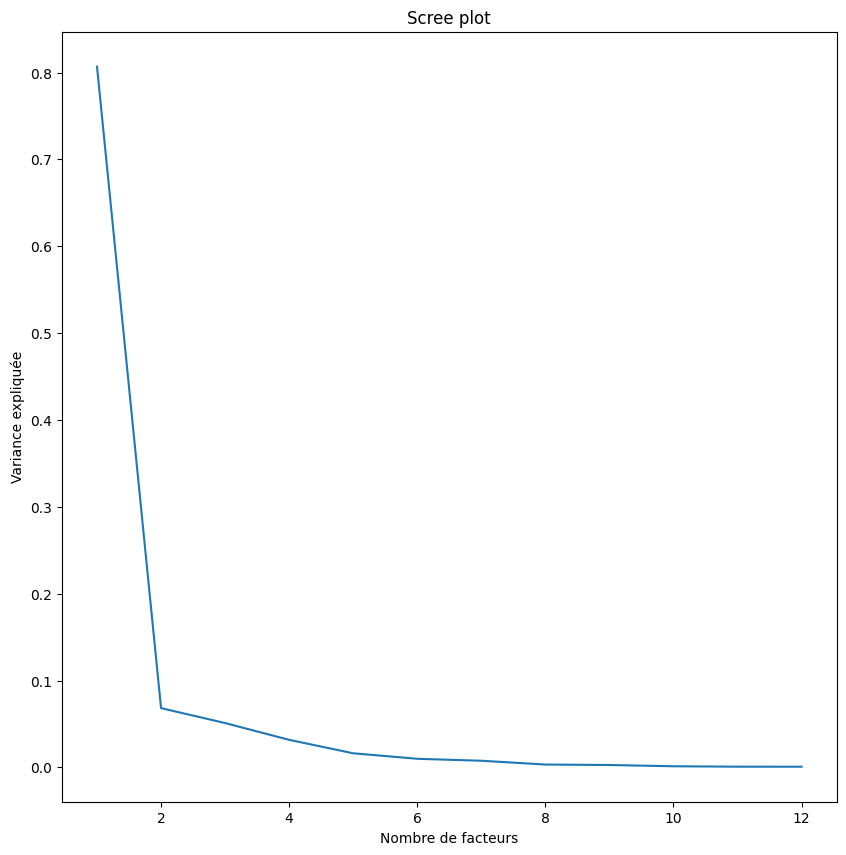

In [396]:
plt.plot(np.arange(1,p+1),acp.explained_variance_ratio_)
plt.title("Scree plot")
plt.ylabel("Variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()

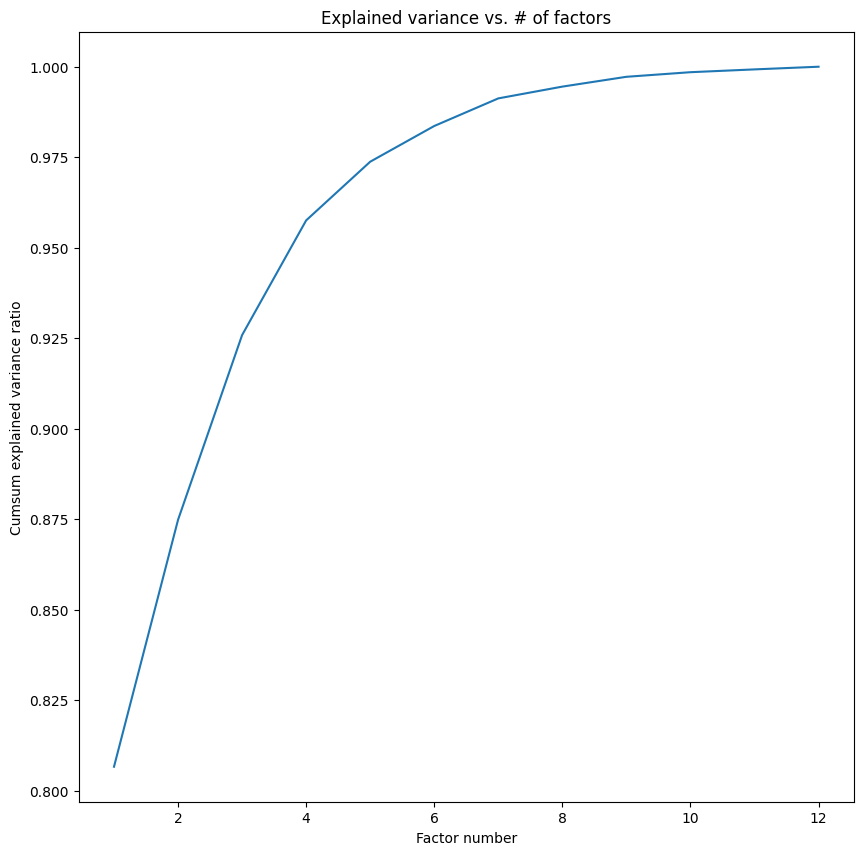

In [397]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [398]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     0.101385  3.103211
1     1.199085  2.103211
2     1.603084  1.603211
3     2.581761  1.269877
4     5.046559  1.019877
5     8.289575  0.819877
6    10.727352  0.653211
7    25.137609  0.510354
8    30.168938  0.385354
9    64.355442  0.274242
10  105.540564  0.174242
11  110.943779  0.083333


In [399]:
cf = pd.DataFrame(coord,index=df_acp_dep.index,columns=np.arange(1,p+1))
cf

,1,2,3,4,5,6,7,8,9,10,11,12
Libellé du département,,,,,,,,,,,,
Ain,0.076583,-0.000014,-0.029239,0.544154,-0.350510,-0.049309,0.060078,0.138212,0.189244,-0.045587,0.002103,0.079799
Aisne,-0.933588,-0.662904,-0.688207,0.123979,-0.069639,-0.102418,-0.004155,0.079204,-0.283758,-0.011098,-0.153099,0.089728
Allier,-1.584323,-0.270007,-0.061202,-0.118451,0.320374,-0.340203,-0.121635,-0.071845,0.198856,-0.031628,0.055765,-0.150622
Alpes-Maritimes,2.459253,0.365953,-0.535117,2.510672,0.020576,-0.236906,0.304522,-0.084910,-0.267667,-0.128875,0.017841,-0.204663
Alpes-de-Haute-Provence,-2.985099,0.149404,-0.070586,0.069511,0.199694,0.008777,0.125163,-0.190844,0.060029,0.024357,-0.023597,0.039559
...,...,...,...,...,...,...,...,...,...,...,...,...
Vienne,-1.048031,-0.130290,-0.072668,-0.395083,-0.067428,-0.011805,-0.006731,-0.143185,-0.006402,-0.000060,0.040057,-0.058070
Vosges,-1.443782,-0.307808,-0.253043,0.083330,-0.351452,0.055806,-0.042208,-0.052769,-0.039069,-0.046256,-0.011697,0.026602
Wallis et Futuna,-4.225180,0.476046,-0.256541,-0.077031,0.198086,-0.100841,0.155250,-0.096536,0.023477,0.026826,-0.022503,0.058609


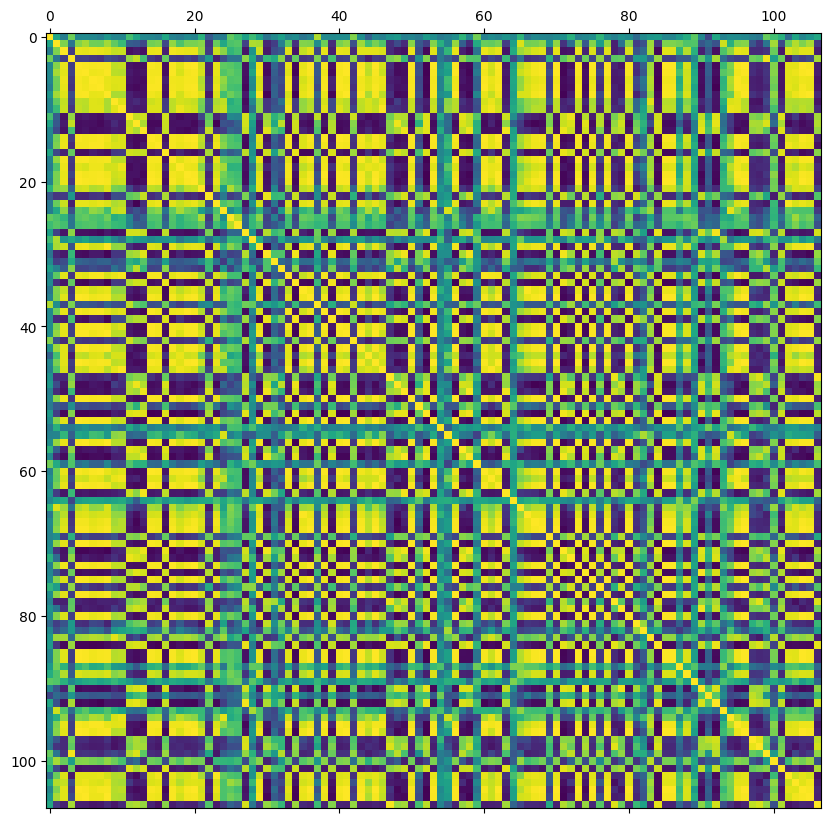

In [400]:
cf = pd.DataFrame(coord,index=df_acp_dep.index,columns=np.arange(1,p+1)).T
plt.matshow(cf.corr())

In [401]:
df_acp_dep_mini = df_acp_dep.head(10)

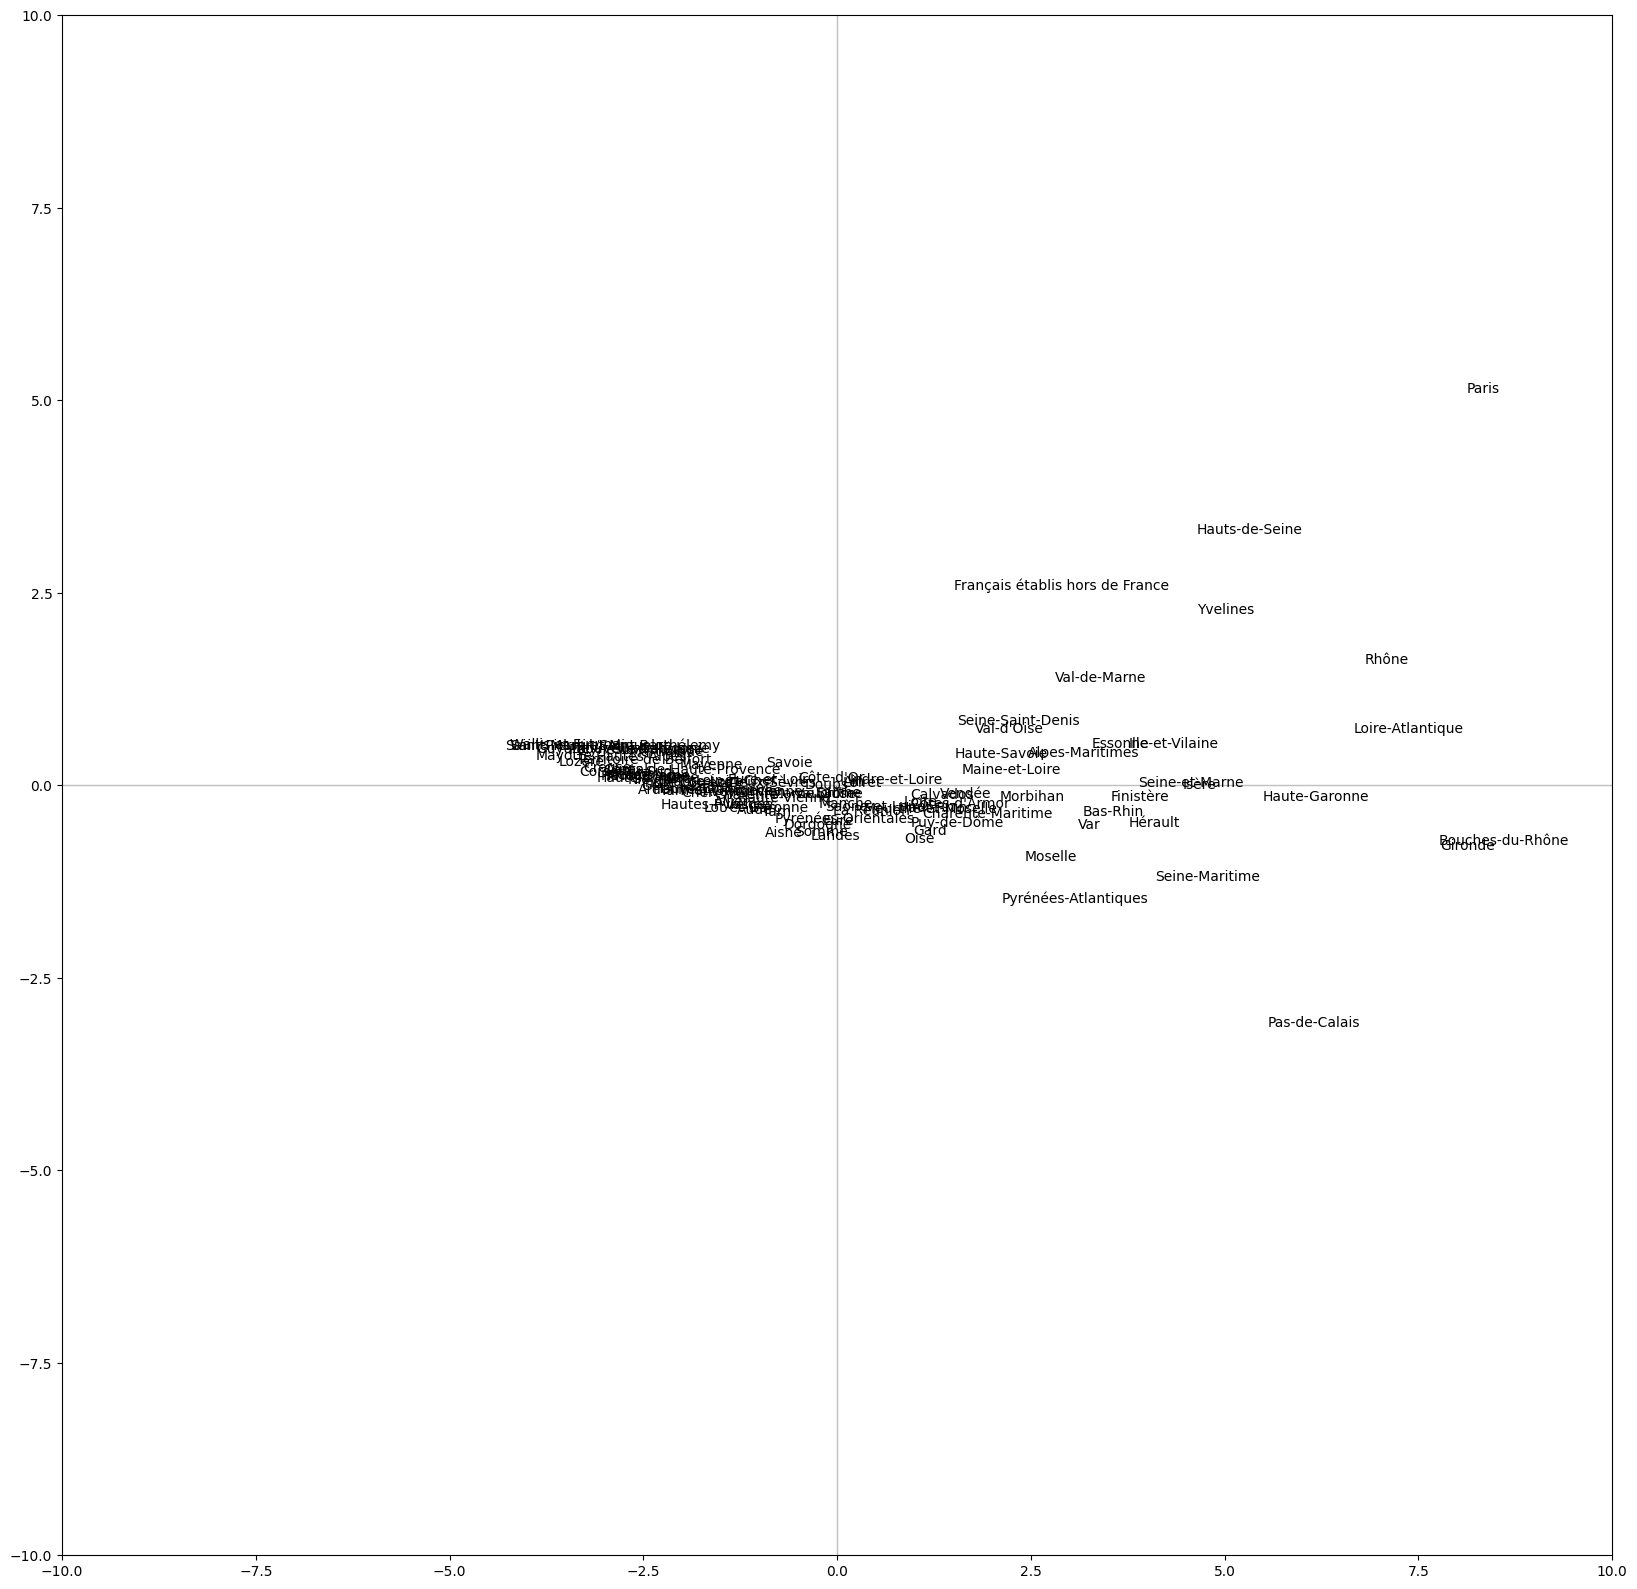

In [402]:
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
for i in range(n):
    plt.annotate(df_acp_dep.index[i],(coord[i,0],coord[i,1]))
plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)
plt.show()

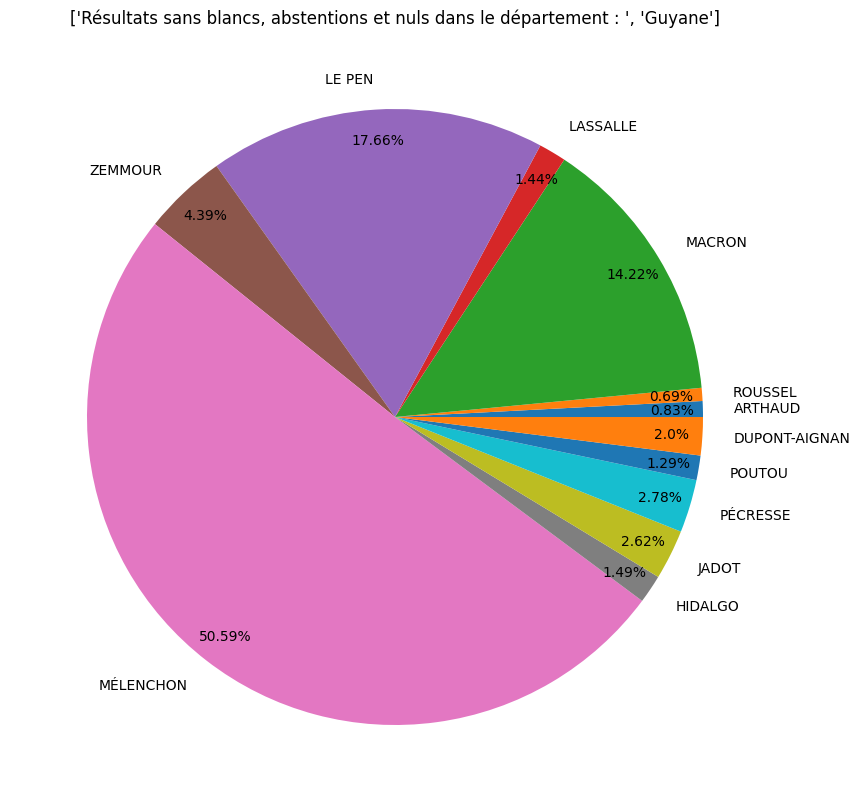

In [403]:
camembertDepObs("Guyane",False)

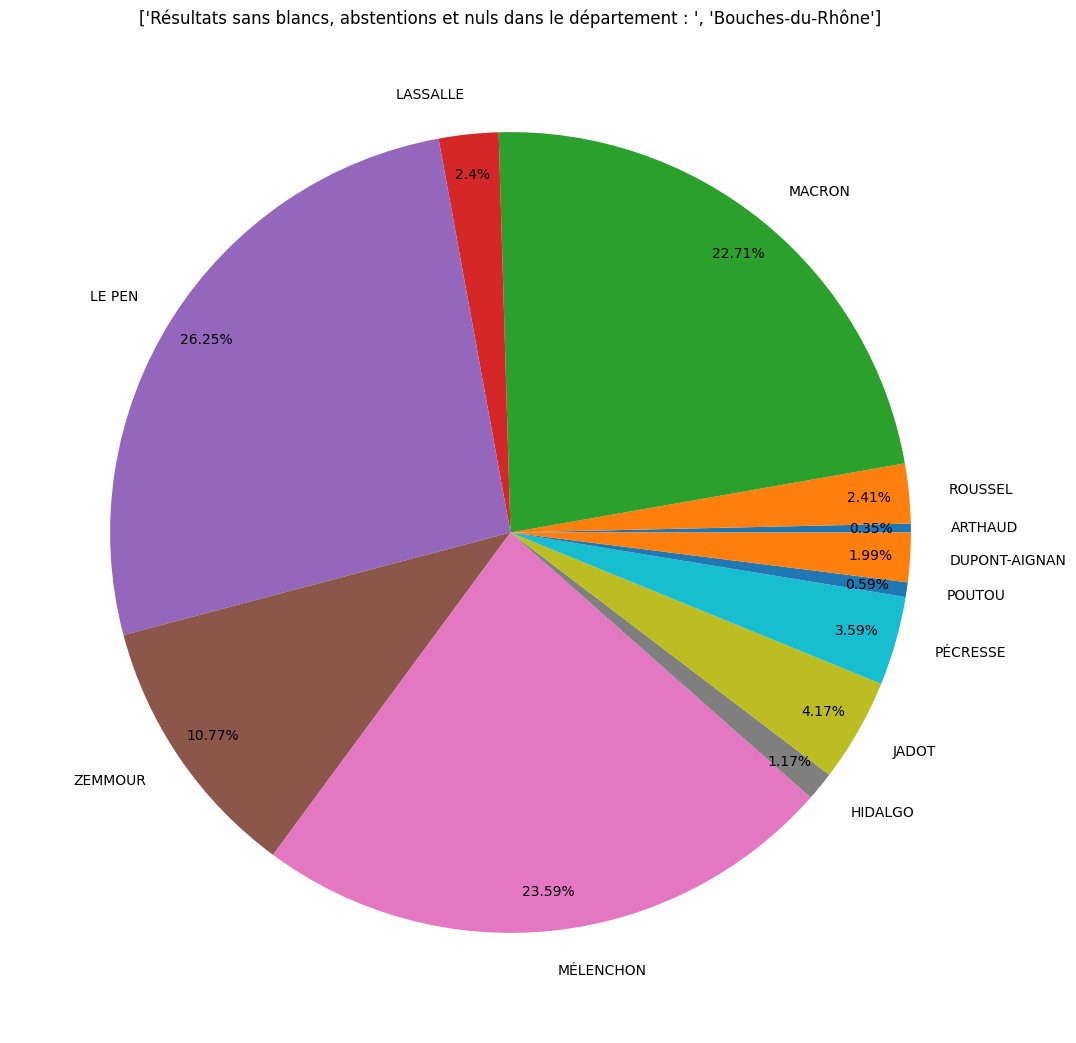

In [404]:
camembertDepObs("Bouches-du-Rhône",False)

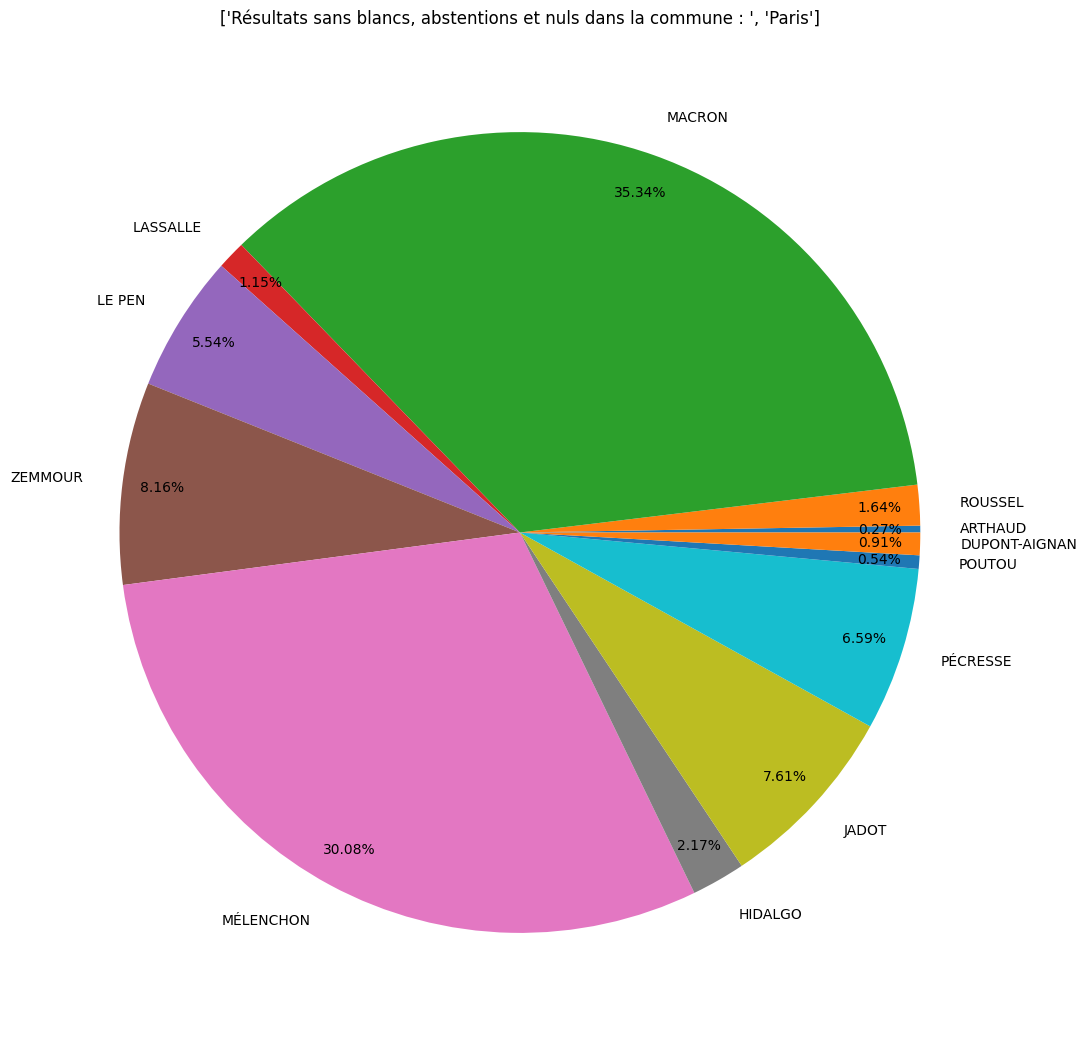

In [405]:
camembertCommObs("Paris",False)

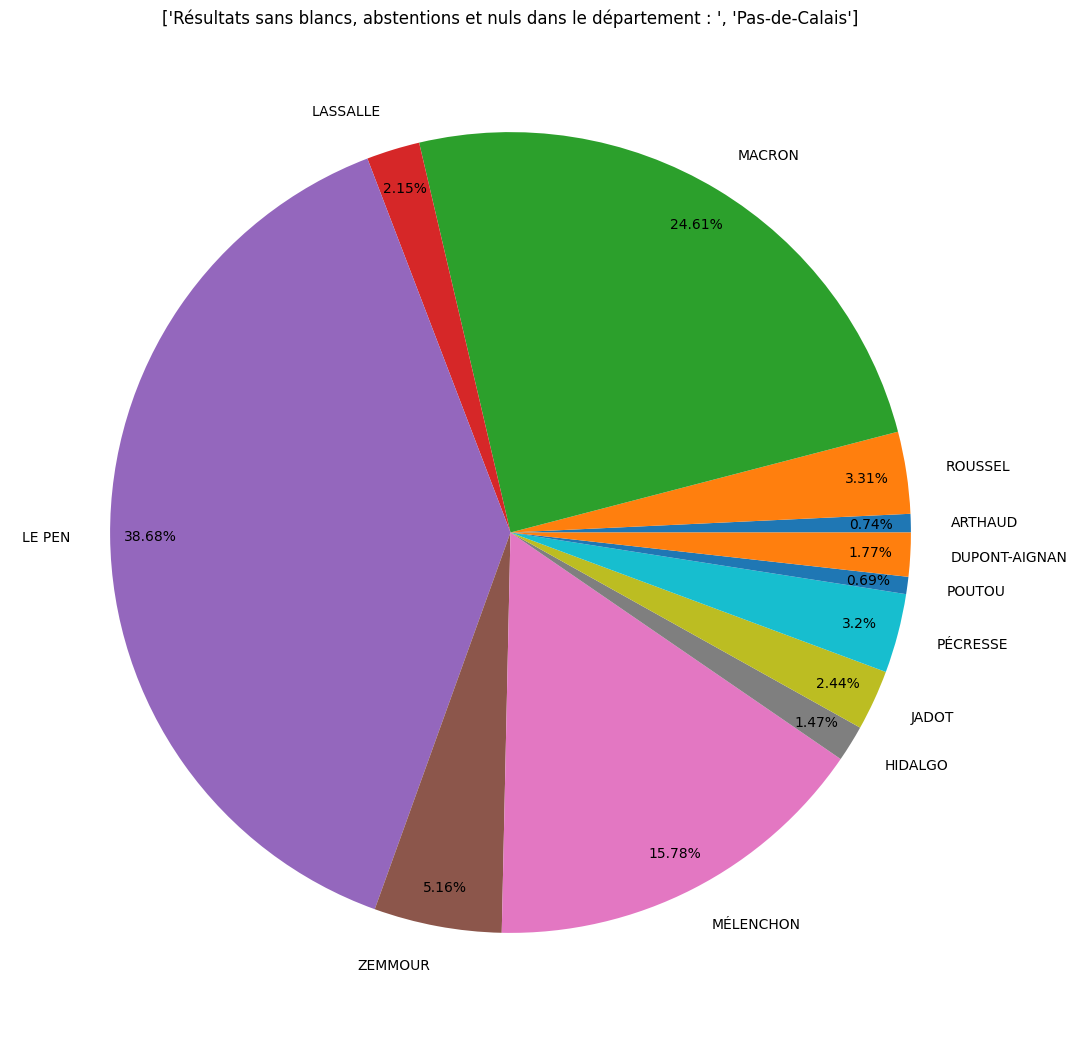

In [406]:
camembertDepObs("Pas-de-Calais",False)

In [407]:
di = np.sum(Z**2,axis=1)
pd.DataFrame({'ID':df_acp_dep.index,'d_i':di})

,ID,d_i
0,Ain,0.495088
1,Aisne,1.933789
2,Allier,2.905434
3,Alpes-Maritimes,13.058619
4,Alpes-de-Haute-Provence,9.041309
...,...,...
102,Vienne,1.306966
103,Vosges,2.385937
104,Wallis et Futuna,18.238556
105,Yonne,3.914223


In [408]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    
pd.DataFrame({'id':df_acp_dep.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

,id,COS2_1,COS2_2
0,Ain,0.011846,3.688567e-10
1,Aisne,0.450714,2.272437e-01
2,Allier,0.863925,2.509213e-02
3,Alpes-Maritimes,0.463137,1.025539e-02
4,Alpes-de-Haute-Provence,0.985567,2.468843e-03
...,...,...,...
102,Vienne,0.840395,1.298852e-02
103,Vosges,0.873664,3.970997e-02
104,Wallis et Futuna,0.978814,1.242530e-02
105,Yonne,0.961984,1.508149e-03


In [409]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
pd.DataFrame({'id':df_acp_dep.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

,id,CTR_1,CTR_2
0,Ain,0.000541,1.423332e-12
1,Aisne,0.080344,3.425053e-03
2,Allier,0.231383,5.682179e-04
3,Alpes-Maritimes,0.557507,1.043797e-03
4,Alpes-de-Haute-Provence,0.821412,1.739767e-04
...,...,...,...
102,Vienne,0.101249,1.323092e-04
103,Vosges,0.192153,7.384564e-04
104,Wallis et Futuna,1.645638,1.766296e-03
105,Yonne,0.347102,4.601041e-05


In [410]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))

for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(corvar)

[[ 9.86450375e-02  2.60064707e-01 -4.39604410e-02 -1.34439100e-01
  -2.67493617e-01 -7.80507007e-01  4.09082379e-02  2.04801975e-01
  -6.28981044e-01  5.27383250e+00  5.17321454e+00  2.37984631e+00]
 [ 8.66103474e-02 -5.45203623e-01 -3.56236660e-01  3.58094313e-01
   1.60312715e-01 -3.29371979e-01  7.15844999e-01  9.97998645e-01
  -1.20679859e+00 -2.09962458e-01 -2.61641703e+00  6.04976132e+00]
 [ 9.32977349e-02  2.69728042e-01 -1.30745093e-01 -1.78297946e-01
   1.04117263e+00  2.09669017e+00 -5.79709187e-01  3.10725038e-01
   1.18445165e-01  5.19373055e-01  3.73596853e-02  2.24749068e+00]
 [ 9.17303416e-02  1.76650732e-01 -7.86784938e-02  1.00802554e+00
   4.82435467e-01  3.81910790e-02  1.02536042e+00 -1.28249634e-01
  -1.70194564e+00 -3.12406545e-03  5.45896883e-01 -5.26385682e+00]
 [ 9.18361928e-02  4.34815669e-01 -7.67148013e-02  2.45484349e-01
  -3.02075241e-02 -1.11193934e+00 -1.94841631e+00  1.09472784e+00
  -2.57714048e-01 -3.16554020e+00 -1.06292958e+00  1.18287124e+00]
 [ 9.

In [411]:
pd.DataFrame({'id':df_acp_dep.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

,id,COR_1,COR_2
0,Voix.ME,0.098645,0.260065
1,Voix.LPM,0.086610,-0.545204
2,Voix.MJL,0.093298,0.269728
3,Voix.ZE,0.091730,0.176651
4,Voix.PV,0.091836,0.434816
5,Voix.JY,0.094569,0.405293
6,Voix.LJ,0.071112,-0.361923
7,Voix.DAN,0.094351,-0.158900
8,Voix.HA,0.094810,0.126072
9,Voix.RF,0.093063,-0.300036


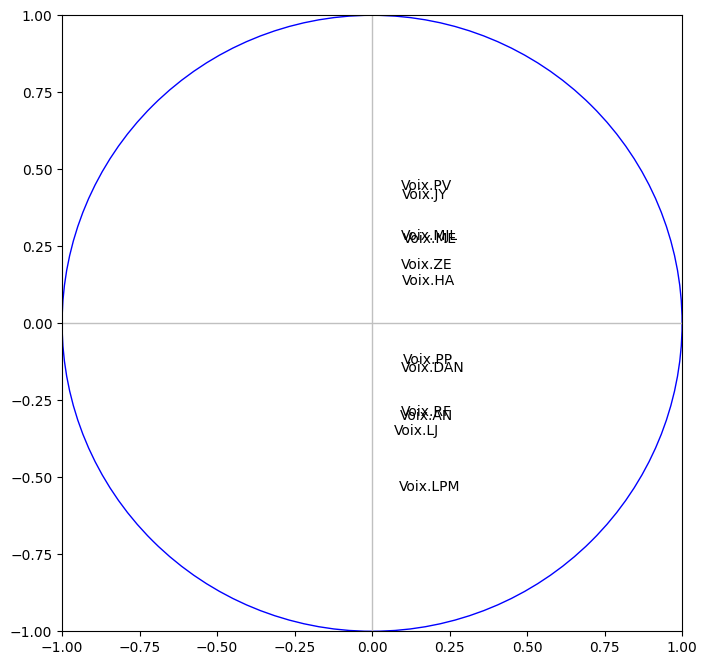

In [412]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(df_acp_dep.columns[j],(corvar[j,0],corvar[j,1]))
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

### Au vu du fait qu'il y'ai un grand nombre de candidats et donc de variable nous allons les regrouper selon leurs bords politique 

In [413]:
data2 = pd.read_txt("resultats-par-niveau-burvot-t1-france-entiere.txt", header=0, sep=';', encoding='latin-1')
data2['Code du département'] = data2['Code du département'].astype(str).str.zfill(2)

def dep_candidat(voix_col, choix, asc):
    tab2 = data2[['Code du département', 'Libellé du département', voix_col]]
    tab2 = tab2.rename(columns={voix_col: choix})

    tab2 = tab2.groupby(['Code du département', 'Libellé du département']).sum().reset_index()

    tab2 = tab2.sort_values(by=[choix], ascending=asc)

    return tab2

def cre_tab_dep(tab2, nom):
    res = tab2.groupby(["Code du département"]).sum().reset_index()
    super = pd.DataFrame(data=res.astype(int).sum(axis=1), columns=[nom])
    a = pd.DataFrame(data2[["Code du département"]]).groupby(["Code du département"]).sum().reset_index()
    fusion = a.join(super, how='outer')
    return fusion

df_G = data2[['Code du département', 'Libellé du département', 'Voix.MJL', 'Voix.AN', 'Voix.PP', 'Voix.JY', 'Voix.RF', 'Voix.HA']]
df_CD = data2[['Code du département', 'Libellé du département', 'Voix.ME', 'Voix.LJ', 'Voix.PV', 'Voix.DAN']]
df_ED = data2[['Code du département', 'Libellé du département', 'Voix.ZE', 'Voix.LPM']]

df_G = cre_tab_dep(df_G, "Voix Gauche")
df_CD = cre_tab_dep(df_CD, "Voix Centre Droite")
df_ED = cre_tab_dep(df_ED, "Voix Extrême droite")



AttributeError: module 'pandas' has no attribute 'read_txt'

In [ ]:

one = pd.merge(df_G, df_CD)
fusion = pd.merge(one, df_ED)

#on remplace  les valeurs manquantes par des zéros
fusion.fillna(0, inplace=True)

# on fusionne les données des voix avec les données géographiques des départements
sf['code'] = sf['code'].astype(str)  # Convertir la colonne 'code' en chaîne de caractères
departements_voix = pd.merge(sf, fusion, left_on='code', right_on='Code du département', how='left')

# on trouve le groupe avec le plus grand nombre de voix pour chaque département
departements_voix['Groupe Max'] = departements_voix[['Voix Gauche', 'Voix Centre Droite', 'Voix Extrême droite']].idxmax(axis=1)


groupe_codes = {'Voix Gauche': 0, 'Voix Centre Droite': 1, 'Voix Extrême droite': 2}
departements_voix['Groupe Max'] = departements_voix['Groupe Max'].map(groupe_codes)


# Ici, nous choisissons la colonne "Groupe Max" pour représenter le groupe avec le plus de voix
colonne_couleur = 'Groupe Max'

# Afficher la carte avec les couleurs correspondantes
fig, ax = plt.subplots(figsize=(12, 8))
departements_voix.plot(column=colonne_couleur, cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# légende

labels = ['Voix Gauche', 'Voix Centre Droite', 'Voix Extrême droite']
colors = ['r', 'y', 'b']


legend_labels = []
for label, color in zip(labels, colors):
    legend_labels.append(plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label))

# On ajoute la légende à la carte

ax.legend(handles=legend_labels)
# on affiche le titre
plt.title('Victoire par bord politique au premier tour des élections présidentielles de 2022')

# on affiche la carte
plt.show()
